In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Boston House Pricing Dataset

In [32]:
df = pd.read_csv('D:\ML Projects\Boston-House-Pricing\BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


"""

- CRIM   -- per capita crime rate by town
- ZN     -- proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS  -- proportion of non-retail business acres per town
- CHAS   -- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX    -- nitric oxides concentration (parts per 10 million)
- RM     -- average number of rooms per dwelling
- AGE    -- proportion of owner-occupied units built prior to 1940
- DIS    -- weighted distances to five Boston employment centres
- RAD    -- index of accessibility to radial highways
- TAX    -- full-value property-tax rate per $10,000
- PTRATIO  -- pupil-teacher ratio by town
- B        -- 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    -- % lower status of the population
- MEDV(Price) -- Median value of owner-occupied homes in $1000's

"""

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [34]:
# Summarizing the stats of Dataset

df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [35]:
# Checking for Missing Values

df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [36]:
# Removing Null values from column 'rm'

df = df[df['rm'].notna()]
df['rm'].isna().sum()

0

# Exploratory Data Analysis

In [37]:
# Finding Correlations

df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.201470,0.407544,-0.057032,0.420611,-0.219433,0.354739,-0.380572,0.624932,0.582243,0.291731,-0.384064,0.457304,-0.390251
zn,-0.201470,1.000000,-0.536624,-0.043209,-0.518108,0.311173,-0.569695,0.665634,-0.314530,-0.315991,-0.392956,0.176529,-0.413820,0.360031
indus,0.407544,-0.536624,1.000000,0.062351,0.762937,-0.394193,0.646157,-0.709741,0.597721,0.720800,0.382633,-0.357817,0.605595,-0.486625
chas,-0.057032,-0.043209,0.062351,1.000000,0.090371,0.091468,0.087384,-0.098696,-0.008872,-0.037146,-0.121830,0.049972,-0.053698,0.174679
nox,0.420611,-0.518108,0.762937,0.090371,1.000000,-0.302751,0.732899,-0.771108,0.611942,0.666959,0.188830,-0.379640,0.591749,-0.428812
rm,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
age,0.354739,-0.569695,0.646157,0.087384,0.732899,-0.240286,1.000000,-0.751500,0.460090,0.508338,0.264496,-0.275366,0.601124,-0.375437
dis,-0.380572,0.665634,-0.709741,-0.098696,-0.771108,0.203507,-0.751500,1.000000,-0.497970,-0.534763,-0.231444,0.291847,-0.501168,0.251709
rad,0.624932,-0.314530,0.597721,-0.008872,0.611942,-0.210718,0.460090,-0.497970,1.000000,0.910911,0.467820,-0.443338,0.491477,-0.384730
tax,0.582243,-0.315991,0.720800,-0.037146,0.666959,-0.292794,0.508338,-0.534763,0.910911,1.000000,0.462718,-0.440891,0.545687,-0.471253


Text(0.5, 1.0, 'Regression Plot')

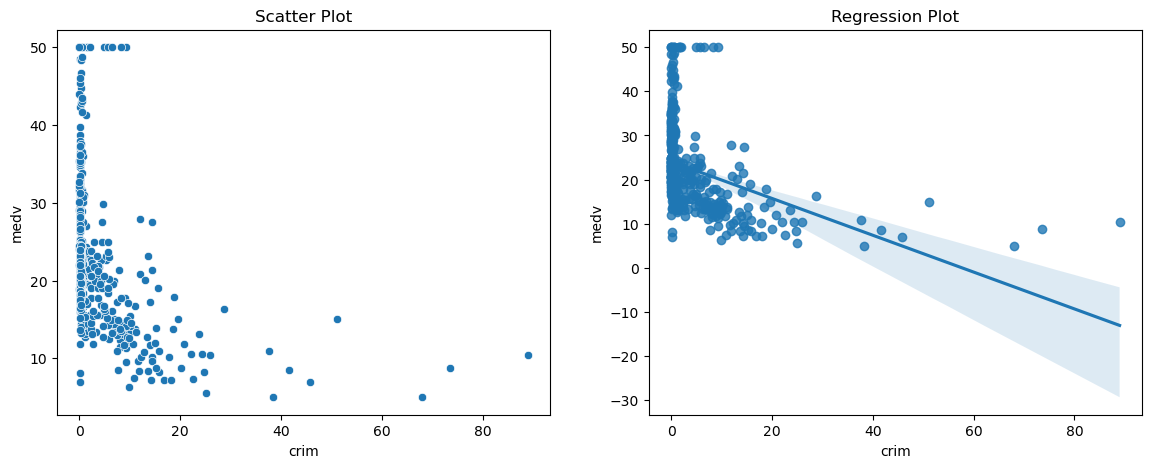

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

sns.scatterplot(df,x='crim',y='medv',ax=ax1)
ax1.set_title('Scatter Plot')

sns.regplot(df,x='crim',y='medv',ax=ax2)
ax2.set_title('Regression Plot')

Here we can say as Crime is increasing our Price is slightly decreasing or Vice-Versa

Text(0.5, 1.0, 'Regression Plot')

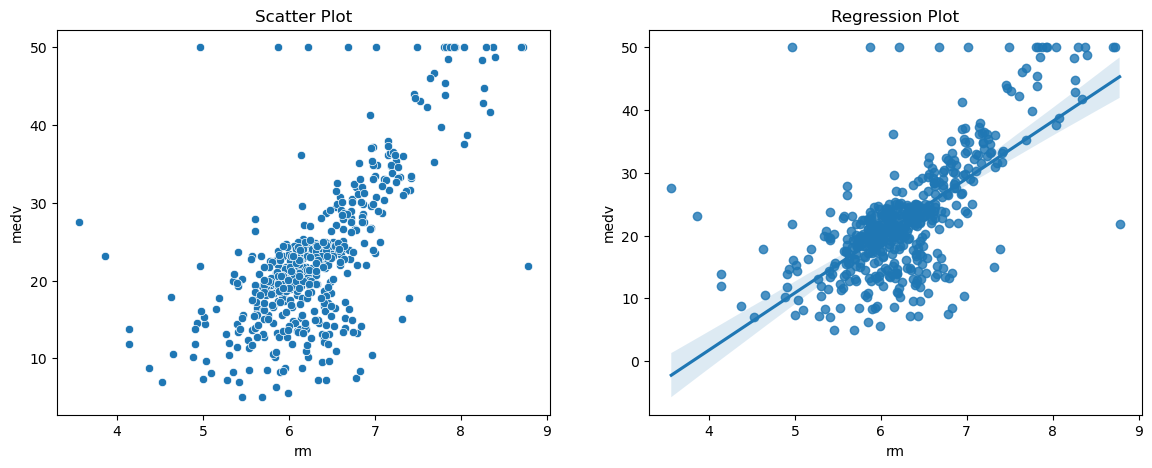

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

sns.scatterplot(df,x='rm',y='medv',ax=ax1)
ax1.set_title('Scatter Plot')

sns.regplot(df,x='rm',y='medv',ax=ax2)
ax2.set_title('Regression Plot')

Here we can say as No. of Average room are increasing our Price is also increasing or Vice-Versa

Text(0.5, 1.0, 'Regression Plot')

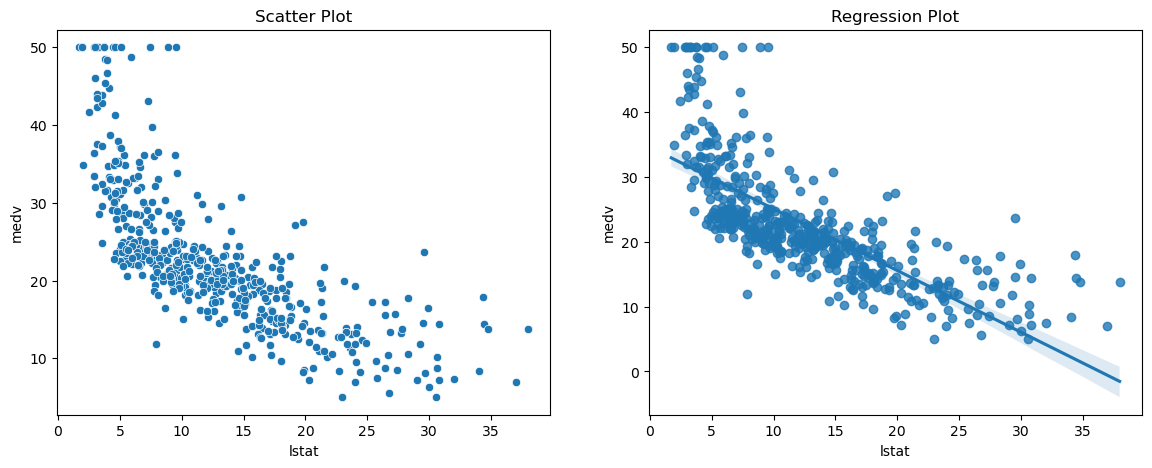

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

sns.scatterplot(df,x='lstat',y='medv',ax=ax1)
ax1.set_title('Scatter Plot')

sns.regplot(df,x='lstat',y='medv',ax=ax2)
ax2.set_title('Regression Plot')

Here we can say as LSTAT is increasing our Price is decreasing or Vice-Versa

Text(0.5, 1.0, 'Regression Plot')

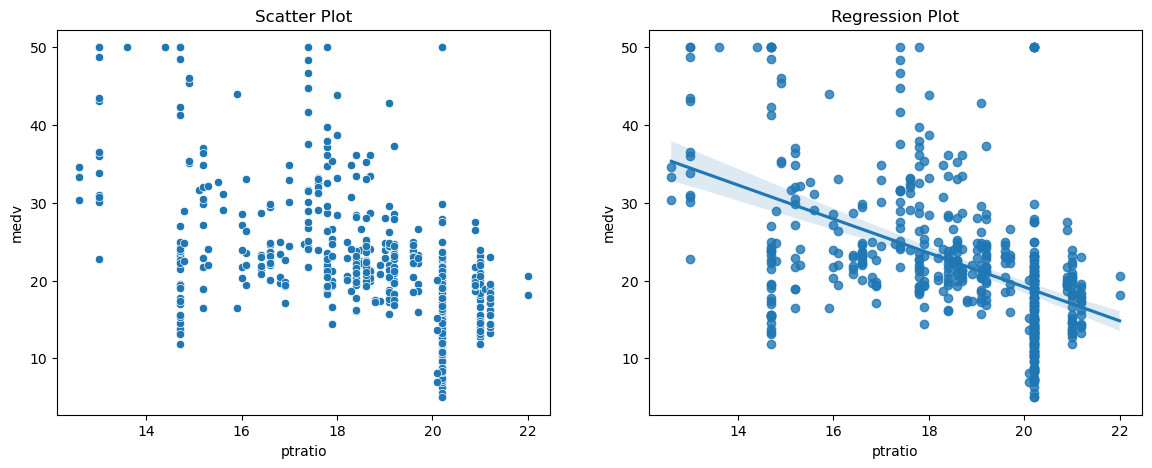

In [41]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

sns.scatterplot(df,x='ptratio',y='medv',ax=ax1)
ax1.set_title('Scatter Plot')

sns.regplot(df,x='ptratio',y='medv',ax=ax2)
ax2.set_title('Regression Plot')

Here we can say as PTRATIO is increasing our Price is slightly decreasing or Vice-Versa

In [42]:
# Train-Test Split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.drop('medv',axis=1),df['medv'],test_size=0.3,random_state=42)
x_train.shape, x_test.shape

((350, 13), (151, 13))

In [43]:
# Standardize the dataset

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [44]:
x_train

array([[-0.44840151, -0.50784842,  2.0688521 , ...,  0.32961188,
         0.34268769,  0.26843794],
       [-0.42934304, -0.50784842, -0.64941187, ..., -0.22127149,
         0.38324048,  0.90068267],
       [-0.36335777, -0.50784842, -0.4709986 , ...,  1.20184388,
         0.31557719,  0.31125361],
       ...,
       [-0.4545728 ,  3.22633113, -1.35871341, ..., -0.63443401,
         0.28970925, -1.1401976 ],
       [ 2.16543333, -0.50784842,  0.97371374, ...,  0.8345883 ,
         0.36866858,  1.37308222],
       [-0.43624799, -0.50784842, -0.410077  , ...,  1.15593693,
         0.41633788,  0.88070202]])

In [45]:
x_test

array([[ 1.15128428, -0.50784842,  0.97371374, ...,  0.8345883 ,
        -2.56864109,  0.12001028],
       [-0.44453227, -0.50784842,  0.20929265, ...,  0.14598409,
         0.16771201, -0.07408742],
       [10.12332083, -0.50784842,  0.97371374, ...,  0.8345883 ,
         0.43023201,  0.67375961],
       ...,
       [-0.36317941,  0.32196926, -1.0758631 , ..., -2.4707119 ,
         0.2853038 ,  0.32837988],
       [ 0.87044886, -0.50784842,  0.97371374, ...,  0.8345883 ,
        -2.8122967 ,  1.53863615],
       [-0.45305555, -0.50784842, -1.33550518, ...,  0.14598409,
         0.39882901, -1.03886718]])

In [46]:
# Pickling the Standardize Dataset

import pickle

pickle.dump(ss,open('scaling.pkl','wb'))

# Model Training

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
# Print the coefficients

lr.coef_

array([-0.81333048,  1.25793481,  0.55901585,  0.62921378, -1.90632294,
        2.57817719,  0.56191215, -2.87590127,  2.74653476, -2.09048251,
       -2.03201533,  1.20544035, -4.54581734])

In [49]:
# Print the intercept

lr.intercept_

22.840285714285717

In [50]:
y_pred = lr.predict(x_test)

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mae)
print(mse)
print(rmse)

3.0541387622304703
18.380869507282043
4.287291628438873


In [52]:
# R2_score Metrics

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.7509342231409273

# New Data Prediction

In [53]:
# Taken 1st row of dataset

a = x_train[0].reshape(1,-1)
a

array([[-0.44840151, -0.50784842,  2.0688521 , -0.26521009,  0.18958149,
        -0.59168786,  0.00233526, -0.67997792, -0.90096229, -1.33539849,
         0.32961188,  0.34268769,  0.26843794]])

In [54]:
# Standardize the values

a = ss.transform(a)
a

d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.50992318, -0.5289195 , -1.35162734, -1.33554648, -3.14649163,
        -9.63902733, -2.50721174, -2.04352405, -1.22860561, -2.450388  ,
        -8.28730029, -4.04929584, -1.74412148]])

In [55]:
# Doing prediction

lr.predict(a)

array([28.24427914])

# Pickling the Model File for Deployment

In [56]:
pickle.dump(lr,open('regmodel.pkl','wb'))
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [59]:
# Prediction

pickled_model.predict(a)

array([28.24427914])